## Kaggle Competition Notebook

### Author : Engr Talha Toqeer
### Linkedin : https://www.linkedin.com/in/muhammad-talha-toqeer-600394212/
### Github : https://github.com/Talha336


## Bank Churn Dataset

### Aim : `We will classify wether the customer will stay in our bank or leave the bank using deep learning approach`

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the Data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [3]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
# Find null values
df_train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [7]:
print(f'The Training size of the data set contains',df_train.shape[0],'rows' ,'and',df_train.shape[1],'columns')

The Training size of the data set contains 165034 rows and 14 columns


In [8]:
df = df_train


In [9]:
from sklearn.preprocessing import LabelEncoder

# Assuming df contains your dataset with categorical columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column is categorical (object datatype)
    if df[column].dtype == 'object':
        # Apply label encoding
        df[column] = label_encoder.fit_transform(df[column])


In [10]:
# Split the data
X = df.drop(['Exited', 'id','CustomerId','Surname'] ,axis=1)
y = df['Exited']



In [11]:
# Train Test Split the data
from sklearn.model_selection import  train_test_split

X_train , X_test , y_train, y_test  = train_test_split(X,y, test_size=0.2,random_state=42)


In [12]:
# Create a deep neural network binary classification
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and capture history
history = model.fit(X_train, y_train, epochs=5, batch_size=10, validation_split=0.2, verbose=0)

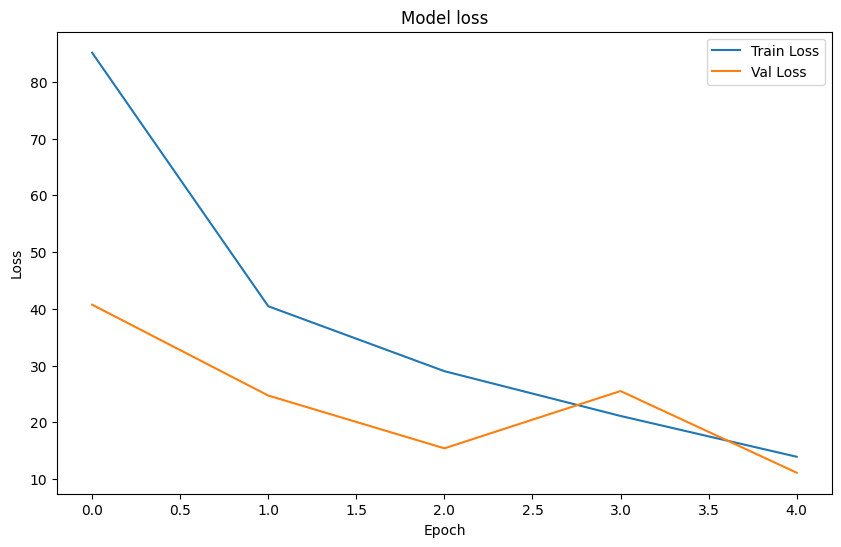

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7854 - loss: 11.3195
Test Accuracy: 0.79


In [14]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/5
10563/10563 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7015 - loss: 8.3532 - val_accuracy: 0.2975 - val_loss: 5.5614
Epoch 2/5
10563/10563 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7214 - loss: 2.2047 - val_accuracy: 0.7885 - val_loss: 0.5175
Epoch 3/5
10563/10563 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.7886 - loss: 0.5166 - val_accuracy: 0.7885 - val_loss: 0.5290
Epoch 4/5
10563/10563 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.7889 - loss: 0.5172 - val_accuracy: 0.7885 - val_loss: 0.5152
Epoch 5/5
10563/10563 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7899 - loss: 0.5139 - val_accuracy: 0.7885 - val_loss: 0.5152


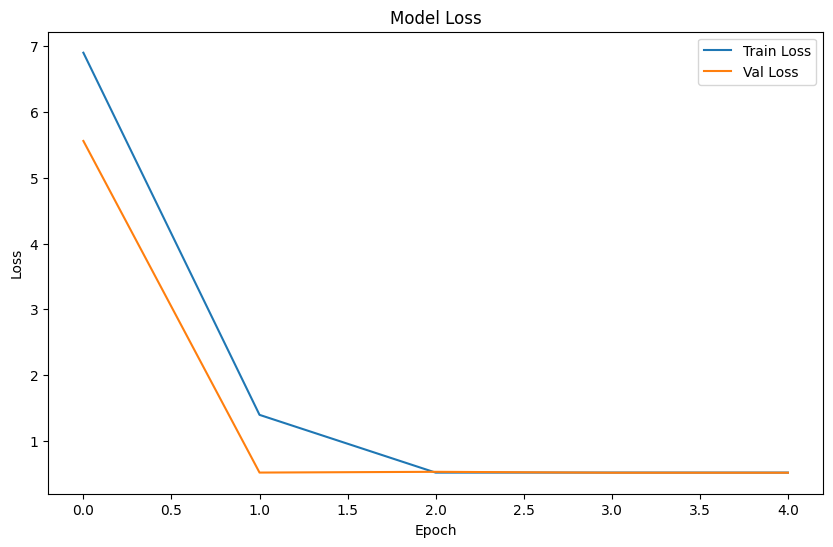

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7873 - loss: 0.5170
Test Accuracy: 0.79
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [15]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=5, batch_size=10, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5)

In [21]:
# Predict on the test set
y_pred = (model.predict(X_test.drop(['Id','CustomerId','Surname']),axis=1) > 0.5)

# Prepare the submission DataFrame
submission['Exited'] = y_pred[:,1]

# Save the submission file
submission.to_csv('submission.csv', index=False)


print("Submission file created successfully.")

KeyError: "['Id', 'CustomerId', 'Surname'] not found in axis"